In [1]:
using NBInclude
@nbinclude("/home/twenty/Nextcloud/Maths/Elections/elections.ipynb")

plotter (generic function with 1 method)

In [2]:
function election(voter_mean_x, voter_mean_y, stdev, number_of_voters, candidate_x_coord, candidate_y_coord)
    v_x = rand(Distributions.Normal(voter_mean_x, stdev), number_of_voters)
    v_y = rand(Distributions.Normal(voter_mean_y, stdev), number_of_voters)

    distance_list = hypot.(v_x .- candidate_x_coord, # diff_x
                           v_y .- candidate_y_coord) # diff_y

    a1::Integer = approval_bullet(distance_list, probability=0.1)
    a2::Integer = approval_bullet(distance_list, probability=0.2)
    a3::Integer = approval_bullet(distance_list, probability=0.3)
    a4::Integer = approval_bullet(distance_list, probability=0.4)
    a5::Integer = approval_bullet(distance_list, probability=0.5)
    a6::Integer = approval_bullet(distance_list, probability=0.6)

    return (a1, a2, a3, a4, a5, a6)
end

election (generic function with 1 method)

In [3]:
function loop_elections(voter_grid, candidate_x_coord, candidate_y_coord, number_of_voters=1000, stdev=1)
    voter_grid_tup_arr = vec(collect(voter_grid))
    voter_grid_size = size(voter_grid_tup_arr)[1]
    a, b = zeros(Float64, voter_grid_size), zeros(Float64, voter_grid_size)
    
    a1, a2, a3,
    a4, a5, a6 =
        zeros(Integer, voter_grid_size), zeros(Integer, voter_grid_size),
        zeros(Integer, voter_grid_size), zeros(Integer, voter_grid_size),
        zeros(Integer, voter_grid_size), zeros(Integer, voter_grid_size)

    @showprogress for i in 1:voter_grid_size
        #t1::Integer, t2::Integer, t3::Integer, t4::Integer, t5::Integer, t6::Integer = election(voter_grid_tup_arr[i][1], voter_grid_tup_arr[i][2], stdev, number_of_voters, candidate_x_coord, candidate_y_coord)
        a1[i]::Integer,
        a2[i]::Integer,
        a3[i]::Integer,
        a4[i]::Integer,
        a5[i]::Integer,
        a6[i]::Integer =
            election(voter_grid_tup_arr[i][1], voter_grid_tup_arr[i][2], stdev, number_of_voters, candidate_x_coord, candidate_y_coord)
        
        a[i] = voter_grid_tup_arr[i][1]
        b[i] = voter_grid_tup_arr[i][2]
    end
    
    vdf = DataFrame()
    vdf.a1 = a1
    vdf.a2 = a2
    vdf.a3 = a3
    vdf.a4 = a4
    vdf.a5 = a5
    vdf.a6 = a6
    vdf.x = a
    vdf.y = b
    return vdf
end

loop_elections (generic function with 3 methods)

In [4]:
function plotter(df, candidate_x_coord, candidate_y_coord)
    p1 = plot(df.x, df.y, title="0.1", seriestype=:scatter, color=df.a1, palette=[:red, :lightgreen, :blue], msw=0, markersize=2)
    plot!(candidate_x_coord, candidate_y_coord, seriestype=:scatter, palette=[:green, :blue, :red], msw=1, markersize=5, lims=(-2,2))
    p2 = plot(df.x, df.y, title="0.2", seriestype=:scatter, color=df.a2, palette=[:red, :lightgreen, :blue], msw=0, markersize=2)
    plot!(candidate_x_coord, candidate_y_coord, seriestype=:scatter, palette=[:green, :blue, :red], msw=1, markersize=5, lims=(-2,2))
    p3 = plot(df.x, df.y, title="0.3", seriestype=:scatter, color=df.a3, palette=[:red, :lightgreen, :blue], msw=0, markersize=2)
    plot!(candidate_x_coord, candidate_y_coord, seriestype=:scatter, palette=[:green, :blue, :red], msw=1, markersize=5, lims=(-2,2))
    p4 = plot(df.x, df.y, title="0.4", seriestype=:scatter, color=df.a4, palette=[:red, :lightgreen, :blue], msw=0, markersize=2)
    plot!(candidate_x_coord, candidate_y_coord, seriestype=:scatter, palette=[:green, :blue, :red], msw=1, markersize=5, lims=(-2,2))
    p5 = plot(df.x, df.y, title="0.5", seriestype=:scatter, color=df.a5, palette=[:red, :lightgreen, :blue], msw=0, markersize=2)
    plot!(candidate_x_coord, candidate_y_coord, seriestype=:scatter, palette=[:green, :blue, :red], msw=1, markersize=5, lims=(-2,2))
    p6 = plot(df.x, df.y, title="0.6", seriestype=:scatter, color=df.a6, palette=[:red, :lightgreen, :blue], msw=0, markersize=2)
    plot!(candidate_x_coord, candidate_y_coord, seriestype=:scatter, palette=[:green, :blue, :red], msw=1, markersize=5, lims=(-2,2))
    final_plot = plot(p1, p2, p3, p4, p5, p6, legend = false, size=((900,500)))
    return final_plot
end

plotter (generic function with 1 method)

In [5]:
const candidate_x_coord = [0.93 0.79 0.27]
const candidate_y_coord = [0.49 0.42 0.45]
const voter_grid = Iterators.product(-2:0.1:2, -2:0.1:2);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Please wait...


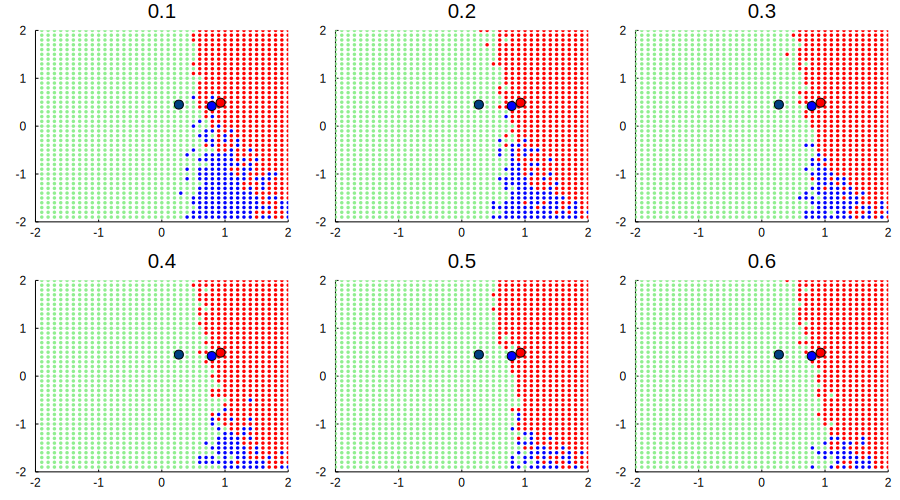

In [8]:
looped = loop_elections(voter_grid, candidate_x_coord, candidate_y_coord);
println("Please wait...")
chart = plotter(looped, candidate_x_coord, candidate_y_coord)

In [9]:
png(chart, "approval_bullet")